In [1]:
import pandas as pd
import numpy as np
import plotly 
import os
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
ROOT = ".."
dataDir = os.path.join(ROOT, "02 data input")
outputDir = '.'

list(os.listdir(dataDir))

['.DS_Store',
 '510050.OF_ETF.csv',
 'README.md',
 'wind全A.csv',
 '利率类20070901-20200308.csv',
 '商品类20070901-20200308.csv',
 '用wind全A算市场动量和交易活跃指标.csv',
 '股票指数类 20070901-20200308.csv']

In [3]:
rawRateDf = pd.read_csv(os.path.join(dataDir, '利率类20070901-20200308.csv'))
rawCommodityDf = pd.read_csv(os.path.join(dataDir, '商品类20070901-20200308.csv'))
rawStockIndexDf = pd.read_csv(os.path.join(dataDir, '股票指数类 20070901-20200308.csv'))
rawWindADf = pd.read_csv(os.path.join(dataDir, '用wind全A算市场动量和交易活跃指标.csv'))
rawETFDf = pd.read_csv(os.path.join(dataDir, '510050.OF_ETF.csv'), sep='\t')

In [4]:
def getPctChange(df, days = 5):
    df_pctChange5 = df.pct_change(days)
    df_pctChange5.columns = map(lambda x: x+'_pctChange5', df_pctChange5.columns )
    return(df_pctChange5)


In [11]:
bankRateDf.replace(0, np.nan)

,IBO001,R007,B0
date,,,
2007-09-03,1.8289,2.4612,2.4713
2007-09-04,1.8828,2.1780,2.1805
2007-09-05,1.8201,2.3618,2.3678
2007-09-06,1.8173,2.4748,2.4389
2007-09-07,2.0160,2.8528,2.8629
...,...,...,...
2020-03-02,1.7859,2.2903,2.2843
2020-03-03,1.6923,2.2427,2.2410
2020-03-04,1.5416,2.1684,2.1635


In [23]:
bankRateDf = rawRateDf.iloc[:,[0, 3, 5, 6]]

bankRateDf.columns = bankRateDf.loc[2, :]
bankRateDf = bankRateDf.drop([0,1,2]).rename(columns={'指标名称':'date'})
bankRateDf.columns.rename('', inplace = True)
bankRateDf = bankRateDf.set_index('date')
bankRateDf = bankRateDf.astype(float)
bankRateDf.index = pd.DatetimeIndex(bankRateDf.index)

bankRateDf = bankRateDf.replace(0, np.nan)
bankRateDf.describe()

,IBO001,R007,B0
count,3124.000000,3124.000000,3123.000000
mean,2.403769,3.013102,3.011521
std,0.944573,1.121663,1.122235
min,0.806400,0.872100,0.871900
25%,1.904675,2.421650,2.416650
50%,2.362850,2.891450,2.891100
75%,2.796675,3.486275,3.485700
max,13.828400,11.621700,11.649300


In [24]:
bankRateDf_pctChange5 = getPctChange(bankRateDf)


In [26]:
rateDf = rawRateDf
rateDf.columns = rateDf.loc[2, :]
rateDf = rateDf.drop([0,1,2])
rawShiborDf = rateDf.loc[:,['指标名称', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M']].rename(columns={'指标名称':'date'})
rawShiborDf.columns.rename('', inplace = True)
shiborDf = rawShiborDf.set_index('date')
shiborDf = shiborDf.astype(float)
shiborDf.index = pd.DatetimeIndex(shiborDf.index)

shiborDf = shiborDf.replace(0, np.nan)
shiborDf.describe()

,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,SHIBOR3M,SHIBOR6M
count,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000
mean,2.372188,2.910861,3.246486,3.555520,3.710275,3.734329
std,0.938078,1.091176,1.219907,1.294267,1.167099,1.055777
min,0.800800,0.881500,0.905000,1.013300,1.204400,1.465600
25%,1.891750,2.364500,2.616000,2.741500,2.848850,2.931150
50%,2.330000,2.758000,3.092700,3.439200,3.881700,4.100000
75%,2.750000,3.315000,3.817000,4.201500,4.601400,4.586000
max,13.444000,11.004000,13.578600,9.698000,6.461100,5.524200


In [28]:
shiborDf_pctChange5 = getPctChange(shiborDf)


In [29]:
rawGBondDf = rateDf.iloc[:,[0, -3, -2, -1]].rename(columns={'指标名称':'date'})
rawGBondDf.columns.rename('', inplace = True)
GBondDf = rawGBondDf.set_index('date')
GBondDf = GBondDf.astype(float)
GBondDf.index = pd.DatetimeIndex(GBondDf.index)

GBondDf = GBondDf.replace(0, np.nan)
GBondDf.describe()

,国债到期收益率:6个月,国债到期收益率:1年,国债到期收益率:2年
count,2945.000000,2972.000000,2974.000000
mean,2.659003,2.752029,2.921279
std,0.712105,0.688389,0.641113
min,0.250100,0.480100,0.911600
25%,2.206900,2.289525,2.487325
50%,2.667300,2.787850,2.951950
75%,3.253000,3.353775,3.450600
max,4.562100,4.210900,4.450700


In [31]:
GBondDf_pctChange5 = getPctChange(GBondDf)


  0 -> np.nan

In [32]:
commodityDf = rawCommodityDf
commodityDf.columns = commodityDf.loc[2, :]
commodityDf = commodityDf.drop([0,1,2])
commodityDf = commodityDf.rename(columns={'指标名称':'date'})
commodityDf.columns.rename('', inplace = True)
commodityDf = commodityDf.set_index('date')
commodityDf = commodityDf.applymap(lambda x: x.replace(',', ''))
commodityDf = commodityDf.astype(float)
commodityDf.index = pd.DatetimeIndex(commodityDf.index)
commodityDf['COMEX黄金/WTI原油'] = commodityDf['期货收盘价(连续):COMEX黄金']/commodityDf['期货结算价(连续):布伦特原油']
commodityDf.loc[(commodityDf['期货收盘价(连续):COMEX黄金']==0) & (commodityDf['期货结算价(连续):布伦特原油']==0), 'COMEX黄金/WTI原油']=0

commodityDf = commodityDf.replace(0, np.nan)
commodityDf.describe()

,南华综合指数,CRB现货指数:综合,期货收盘价(连续):COMEX黄金,期货结算价(连续):布伦特原油,COMEX黄金/WTI原油
count,3042.000000,3145.000000,3080.000000,3229.000000,3080.000000
mean,1271.113189,440.448102,1266.796948,79.984645,17.398826
std,192.100115,50.701156,244.887634,25.786433,5.872845
min,805.900000,298.570000,684.300000,27.880000,6.386950
25%,1126.197500,411.960000,1141.875000,57.880000,13.403338
50%,1330.105000,432.950000,1265.950000,75.510000,15.894987
75%,1405.885000,476.220000,1387.500000,107.030000,21.435926
max,1676.880000,580.320000,1873.700000,146.080000,41.473719


In [34]:
commodityDf_pctChange5 = getPctChange(commodityDf)

In [36]:
stockIndexDf = rawStockIndexDf.iloc[:,[0, 1, 4, 7]].rename(columns={'Unnamed: 0':'date'})
stockIndexDf = stockIndexDf.drop([0,1,2])
stockIndexDf = stockIndexDf.set_index('date')
stockIndexDf = stockIndexDf.astype(float)
stockIndexDf.index = pd.DatetimeIndex(stockIndexDf.index)

stockIndexDf = stockIndexDf.replace(0, np.nan)
stockIndexDf.describe()

,标普500,日经225,上证综指
count,3042.000000,3042.000000,3042.000000
mean,12065.780319,965.131272,2886.012127
std,4441.714580,241.461212,705.185106
min,4624.420800,486.814800,1706.703000
25%,8479.905825,765.054200,2350.257000
50%,11220.996150,912.362700,2878.561500
75%,15727.692400,1153.136725,3163.843550
max,23707.113400,1539.544400,6092.057000


In [40]:
stockIndexDf_pctChange5 = getPctChange(stockIndexDf)
rawETFDf

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),单位净值(元),累计净值(元)
0,510050.SH,华夏上证50ETF,2007/9/3,4.06,4.08,4.16,4.08,4.16,87119179.0,3.601697e+08,0.10,2.3399,4.1342,4.152,4.988
1,510050.SH,华夏上证50ETF,2007/9/4,4.16,4.16,4.16,4.08,4.09,72517761.0,2.983548e+08,-0.07,-1.6606,4.1142,4.090,4.914
2,510050.SH,华夏上证50ETF,2007/9/5,4.09,4.09,4.12,4.00,4.08,94648987.0,3.826495e+08,0.00,-0.0734,4.0428,4.078,4.900
3,510050.SH,华夏上证50ETF,2007/9/6,4.08,4.09,4.15,4.08,4.13,71327502.0,2.941353e+08,0.04,1.0531,4.1237,4.136,4.969
4,510050.SH,华夏上证50ETF,2007/9/7,4.13,4.11,4.12,4.05,4.06,73237590.0,2.987399e+08,-0.07,-1.5996,4.0791,4.055,4.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,510050.SH,华夏上证50ETF,2020/3/4,2.91,2.90,2.94,2.90,2.94,394532331.0,1.152620e+09,0.03,1.1008,2.9215,2.938,4.063
3040,510050.SH,华夏上证50ETF,2020/3/5,2.94,2.96,3.01,2.95,3.00,792807008.0,2.366717e+09,0.06,2.2116,2.9852,3.007,4.145
3041,510050.SH,华夏上证50ETF,2020/3/6,3.00,2.98,2.99,2.95,2.95,493335273.0,1.463183e+09,-0.05,-1.7643,2.9659,2.955,4.083
3042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 還要算 ETF 波動率

In [39]:
ETFDf = rawETFDf.iloc[:,[2,4, 5, 6, 7]].rename(columns={'日期':'date',
                                                                '收盘价(元)':'50ETF_close',
                                                                '开盘价(元)':'50ETF_open',
                                                                '最高价(元)':'50ETF_high',
                                                                '最低价(元)':'50ETF_low',
                                                            })
ETFDf = ETFDf.set_index('date')
ETFDf = ETFDf.astype(float)
ETFDf.index = pd.DatetimeIndex(ETFDf.index)
ETFDf = ETFDf.iloc[:-2]
ETFDf


,50ETF_open,50ETF_high,50ETF_low,50ETF_close
date,,,,
2007-09-03,4.08,4.16,4.08,4.16
2007-09-04,4.16,4.16,4.08,4.09
2007-09-05,4.09,4.12,4.00,4.08
2007-09-06,4.09,4.15,4.08,4.13
2007-09-07,4.11,4.12,4.05,4.06
...,...,...,...,...
2020-03-02,2.83,2.92,2.83,2.90
2020-03-03,2.93,2.94,2.90,2.91
2020-03-04,2.90,2.94,2.90,2.94


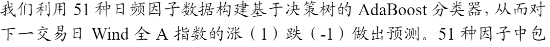

In [73]:
ETFReturn = ETFDf['50ETF_close'].pct_change().rename('ETFReturn')
ETFTomorrowUp = (ETFReturn.shift(-1)>0).rename('ETFTomorrowUp').astype(int)
ETFVolatility60 = ETFReturn.rolling(60).cov().rename('ETFVolatility60')
ETFVolatility120 = ETFReturn.rolling(120).cov().rename('ETFVolatility120')
ETFVolatilityDf = pd.concat([ETFVolatility60, ETFVolatility120], axis = 1)
ETFVolatilityDf

,ETFVolatility60,ETFVolatility120
date,,
2007-09-03,NaN,NaN
2007-09-04,NaN,NaN
2007-09-05,NaN,NaN
2007-09-06,NaN,NaN
2007-09-07,NaN,NaN
...,...,...
2020-03-02,0.000215,0.000135
2020-03-03,0.000212,0.000135
2020-03-04,0.000211,0.000135


In [74]:
ETFVolatilityDf_pctChange5 = getPctChange(ETFVolatilityDf[['ETFVolatility60','ETFVolatility120']])

# Wind A data for 市场动量指标

In [75]:
windADf = rawWindADf.iloc[:, :7]
windADf.columns = windADf.loc[2, :]
windADf = windADf.drop([0,1,2])
windADf = windADf.rename(columns={'Date':'date'})
windADf.columns.rename('', inplace = True)
windADf = windADf.set_index('date')
windADf = windADf.astype(float)
windADf.index = pd.DatetimeIndex(windADf.index)

windAReturn = windADf['close'].pct_change().rename('windAReturn')
windATomorrowUp = (windAReturn.shift(-1)>0).rename('windATomorrowUp').astype(int)

windADf

,pre_close,open,high,low,close,volume
date,,,,,,
2007-09-03,3804.9426,3804.9426,3899.7930,3804.9424,3890.7791,1.934243e+10
2007-09-04,3890.7791,3890.7791,3902.2720,3837.4065,3854.9917,1.833770e+10
2007-09-05,3854.9917,3854.9917,3878.2273,3794.1196,3864.7783,1.494567e+10
2007-09-06,3864.7783,3864.7783,3923.1470,3864.7783,3903.8408,1.626460e+10
2007-09-07,3903.8408,3903.8408,3903.8408,3814.7722,3819.8743,1.825542e+10
...,...,...,...,...,...,...
2020-03-02,4304.3983,4344.8047,4481.2238,4343.9159,4459.3354,8.981298e+10
2020-03-03,4459.3354,4527.9825,4572.9330,4466.1885,4499.4858,1.010211e+11
2020-03-04,4499.4858,4476.6701,4522.9884,4449.4815,4522.9642,8.653929e+10


In [76]:
ys = pd.concat([ETFReturn, ETFTomorrowUp, windAReturn, windATomorrowUp], axis = 1)
ys

,ETFReturn,ETFTomorrowUp,windAReturn,windATomorrowUp
date,,,,
2007-09-03,NaN,0,NaN,0
2007-09-04,-0.016827,0,-0.009198,1
2007-09-05,-0.002445,1,0.002539,1
2007-09-06,0.012255,0,0.010107,0
2007-09-07,-0.016949,1,-0.021509,1
...,...,...,...,...
2020-03-02,0.032028,1,0.035995,1
2020-03-03,0.003448,1,0.009004,1
2020-03-04,0.010309,1,0.005218,1


# mkt Momentum 
???RSI=Sum(Max(Close-LastClose,0),N,1)/Sum(ABS(Close-LastClose),N,1)*100??????

In [77]:
mktVolume = windADf['volume'].rename('mktVolume')
mktVolume_pctChange5 = mktVolume.pct_change(5).rename('mktVolume_pctChange5')
mktClose_pctChange5 = windADf['close'].pct_change(5).rename('mktClose_pctChange5')
mktClose_pctChange5

mktMomentumDf = pd.concat([mktVolume, mktVolume_pctChange5, mktClose_pctChange5], axis = 1)
mktMomentumDf

,mktVolume,mktVolume_pctChange5,mktClose_pctChange5
date,,,
2007-09-03,1.934243e+10,NaN,NaN
2007-09-04,1.833770e+10,NaN,NaN
2007-09-05,1.494567e+10,NaN,NaN
2007-09-06,1.626460e+10,NaN,NaN
2007-09-07,1.825542e+10,NaN,NaN
...,...,...,...
2020-03-02,8.981298e+10,-0.092354,-0.025796
2020-03-03,1.010211e+11,-0.136910,-0.017754
2020-03-04,8.653929e+10,-0.250106,0.005961


In [78]:
X_df = pd.concat([bankRateDf, bankRateDf_pctChange5,
                shiborDf, shiborDf_pctChange5,
                GBondDf, GBondDf_pctChange5,
                commodityDf, commodityDf_pctChange5,
                stockIndexDf, stockIndexDf_pctChange5,
                ETFVolatilityDf, ETFVolatilityDf_pctChange5,
                mktMomentumDf, ys
               ], axis = 1)

X_df.to_csv(os.path.join(outputDir, 'factor.csv'))
X_df.to_pickle(os.path.join(outputDir, 'factor.pkl'))

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\ipykernel_launcher.py:18: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



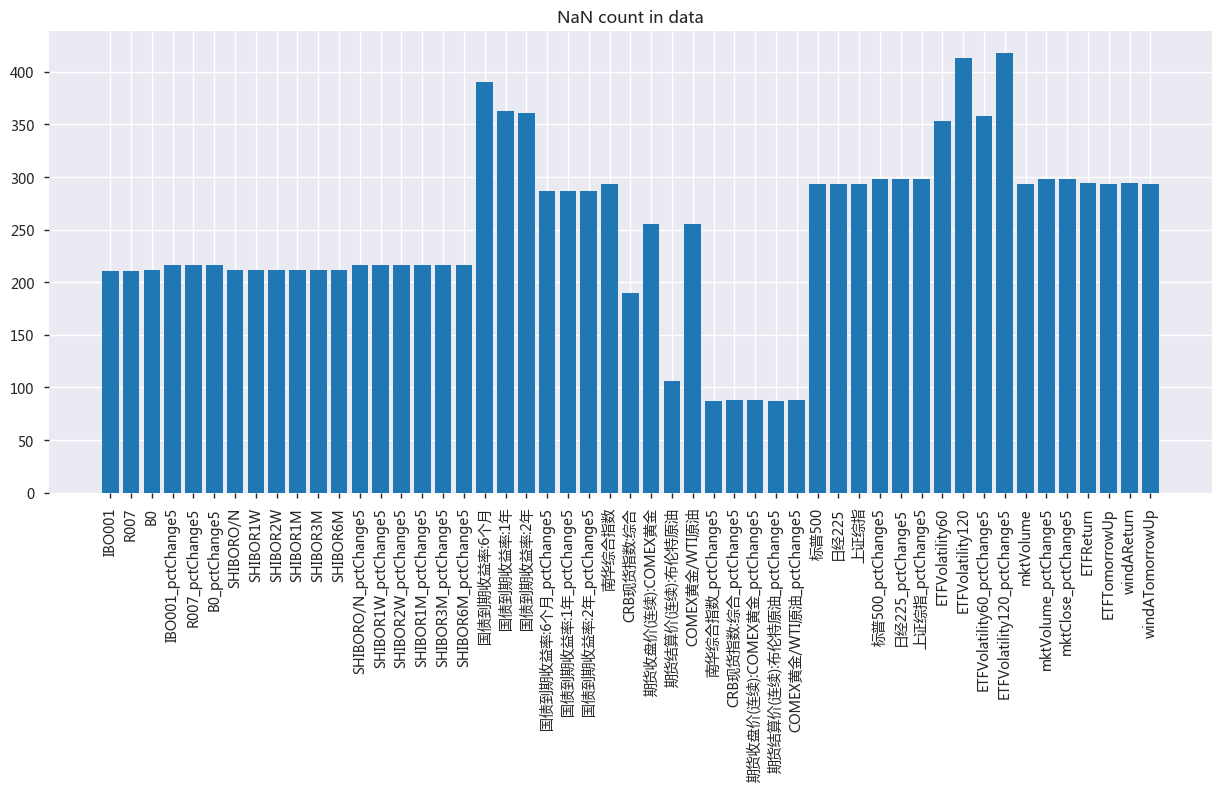

In [79]:
nas_df = X_df.isna()
nas_df.resample('Y').sum()



from pylab import * 
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #更新字体格式
mpl.rcParams['font.size'] = 9 



plt.figure(figsize = (15, 6))
plt.title('NaN count in data')
plt.xticks(rotation='vertical')
plt.bar(nas_df.sum().index, nas_df.sum().values)
plt.show()

In [80]:
import pandas_profiling 
X_df = pd.read_pickle('factor.pkl')
profile = pandas_profiling.ProfileReport(X_df)
profile.to_file(outputfile="report.html")

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 22269 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 20538 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 21040 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26399 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 25910 missing from current font.

C:\ProgramDa

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 26631 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 26222 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 26085 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 32463 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 19978 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 35777 missing from current font.

